[-0.99062919  1.        ] 8.7811986348e-05


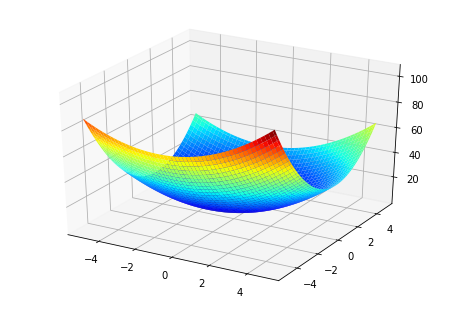

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def f(x):                                   #функция f(x1,x2)
    return (x[0] + 1)**2 + 2*(x[1] - 1)**2

def f_x1(x):                                #производная функции f(x1,x2) по x1
    return 2*(x[0] + 1)

def f_x2(x):                                #производная функции f(x1,x2) по x2
    return 4*(x[1] - 1)

eps=0.02    #заданая точность вычислений
n=2         #количество переменных(нужно при вычислении H)
k=1         #счетчик итераций
E=np.eye(n) #единичная матрица
H=E
xk=np.array([0,0]) #начальная точка
while True:  #алгоритм квазиньютоновского метода
    fp1=np.array([f_x1(xk),f_x2(xk)])   #массив f`(xk)
    a=2
    V=12345678
    while True:      #подбор альфа = argmin(f(xk)-alf*Hk*f`(xk))
        xa=xk-a*fp1
        v = f(xa)
        if(v<V):
            alf=a
            a=a/2
            V=v
        else:
            break
    
    xk_1=xk-H.dot(fp1)*alf     #новый(k+1-ый) икс
    if((f_x1(xk_1) < eps) and (f_x2(xk_1) < eps)): #условие остановки
        break
    
    if((k%n)==0):    #вычисление H
        H=E
    else:
        sig=xk_1-xk                           #коэффициент сигма
        fp2=np.array([f_x1(xk_1),f_x2(xk_1)])
        gam=fp2-fp1                           #коэффициент гамма
        znam=(sig-H.dot(gam)).T.dot(gam)
        H=H+(sig-H.dot(gam)).dot((sig-H.dot(gam)).T)/znam
    
    xk=xk_1       #новый икс становится предыдущим для следующей итерации
    k=k+1

print(xk_1, f(xk_1))

#построение графика функции:
x = np.arange (-5, 5, 0.1)
y = np.arange (-5, 5, 0.1)
xgrafic, ygrafic = np.meshgrid(x, y)
zgrafic = f([xgrafic, ygrafic])
fig = plt.figure()
axes = Axes3D(fig)
axes.plot_surface(xgrafic, ygrafic, zgrafic, cmap = cm.jet)
plt.show()